# ISS Projekt 2023/24 - Kristián Dobeš (xdobes22)

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [14]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xdobes22.wav
# !wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
# !wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

original_signal, original_sample_rate = sf.read("xdobes22.wav")

--2023-12-17 13:21:12--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xdobes22.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: 'xdobes22.wav.1'

     0K .........                                             100% 11.9M=0.001s

2023-12-17 13:21:12 (11.9 MB/s) - 'xdobes22.wav.1' saved [10044/10044]



## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

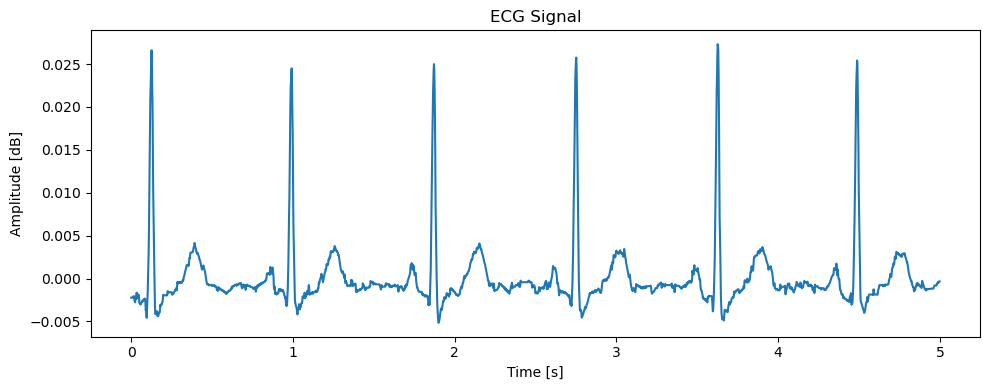

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# segment
segment_duration = 5  # in seconds
segment_length = segment_duration * original_sample_rate
segment = original_signal[:segment_length]

# time axis
time = np.arange(segment_length) / original_sample_rate

# plot
plt.figure(figsize=(10, 4))
plt.plot(time, segment)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [dB]")
plt.title("ECG Signal")
plt.tight_layout()
plt.show()

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

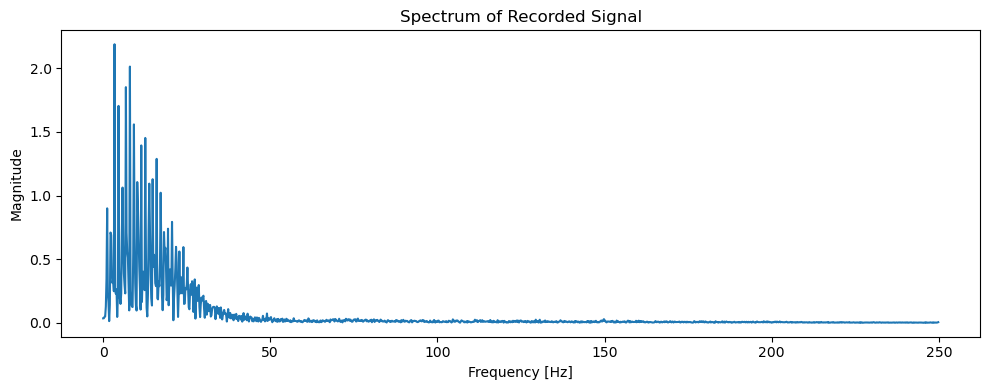

In [16]:
segment_duration = 5  # in seconds
segment_length = segment_duration * original_sample_rate

# segment from the recorded signal
segment = original_signal[:segment_length]

# fft
spectrum = np.fft.fft(segment)

#  frequencies
frequencies = np.fft.fftfreq(segment_length, 1 / original_sample_rate)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:segment_length//2], np.abs(spectrum[:segment_length//2]))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Spectrum of Recorded Signal")
plt.tight_layout()
plt.show()

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Síťové rušení: stroj na měření je pravděpodobně napájen střídavým proudem s frekvencí 50 Hz, toto elektro magnetické pole může pronikat do měřícího zařízení a způsobovat malé rušení na 50 Hz a jeho harmonických frekvencích (zde naapř. trochu na 150 Hz).

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [17]:
import scipy.signal as ss

target_sample_rate = 100

# Remove other half of the spectrum
half = target_sample_rate / 2

# Design a low-pass filter
sos = ss.butter(10, half, btype='low', fs=original_sample_rate, output='sos')

# filtering the original signal
filtered_signal = ss.sosfilt(sos, original_signal)

# Resampling the signal to 100 Hz
resampled_signal = ss.resample(filtered_signal, int(len(filtered_signal) * target_sample_rate / original_sample_rate))

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

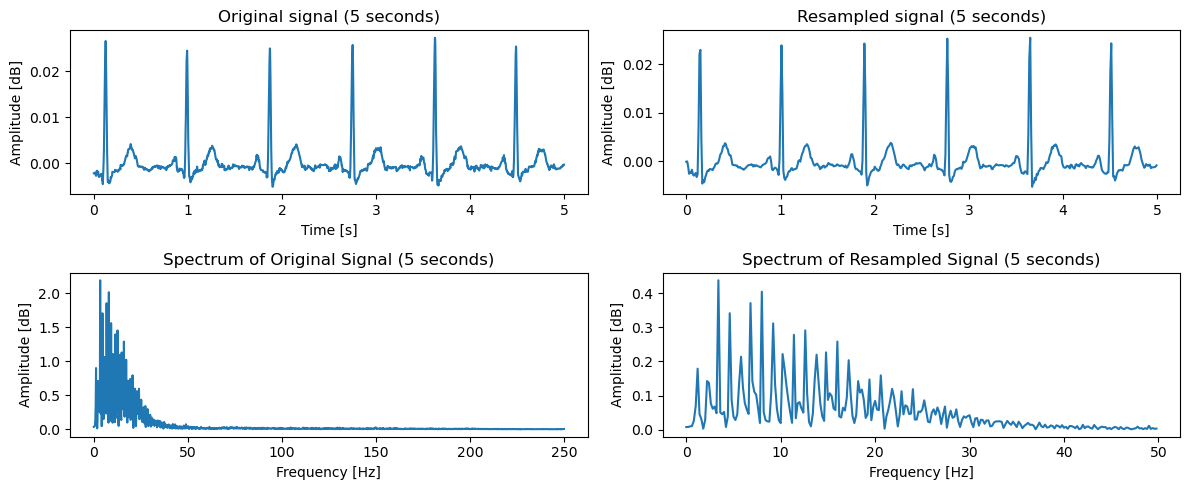

In [18]:
# Select a 5-second segment from both signals - length = sample rate * 5
original_segment = original_signal[:original_sample_rate*5]
resampled_segment = resampled_signal[:target_sample_rate*5]

# Plot signals
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
plt.plot(np.arange(original_sample_rate*5) / original_sample_rate, original_segment)
plt.title('Original signal (5 seconds)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [dB]')

plt.subplot(2, 2, 2)
plt.plot(np.arange(target_sample_rate*5) / target_sample_rate, resampled_segment)
plt.title('Resampled signal (5 seconds)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [dB]')

# Function for calculating and plotting the spectrum
def plot_spectrum(signal, sample_rate, title):
    spectrum = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), d=1/sample_rate)

    plt.plot(frequencies[:len(signal)//2], np.abs(spectrum[:len(signal)//2]))
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')

# Plot the spectrums
plt.subplot(2, 2, 3)
plot_spectrum(original_segment, original_sample_rate, 'Spectrum of Original Signal (5 seconds)')

plt.subplot(2, 2, 4)
plot_spectrum(resampled_segment, target_sample_rate, 'Spectrum of Resampled Signal (5 seconds)')

plt.tight_layout()
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

C:\Users\KristianLenovo\AppData\Local\Temp\ipykernel_13712\316274415.py:25: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)))


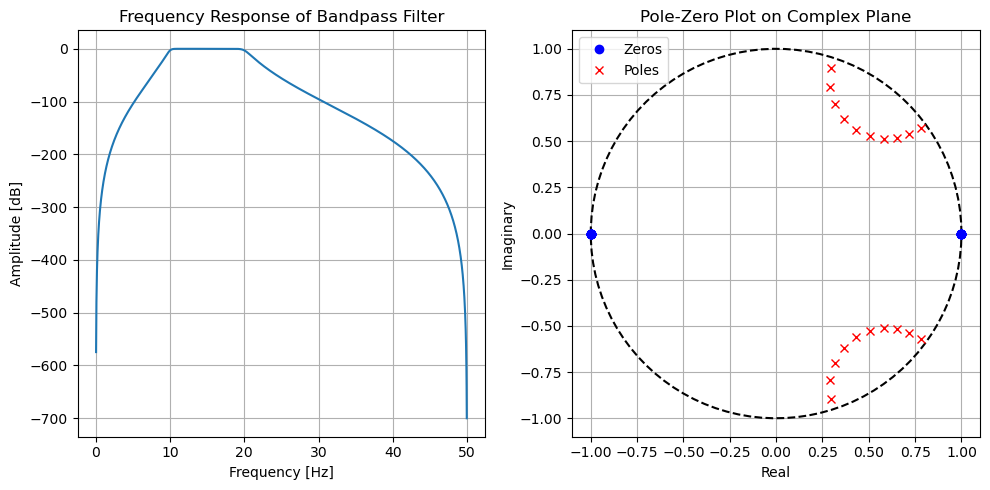

In [19]:
import scipy.signal as ss

# am i supposed to filter the original signal or the resampled one ?
# .. remade for the resampled signal

# make a bandpass filter
# sos = ss.butter(10, [10, 20], btype='bandpass', fs=original_sample_rate, output='sos')
sos = ss.butter(10, [10, 20], btype='bandpass', fs=100, output='sos')

# filtering the resampled signal
# filtered_signal = ss.sosfilt(sos, original_signal)
filtered_signal = ss.sosfilt(sos, resampled_signal)

# calculate the frequency response
# w, h = ss.sosfreqz(sos, worN=2000, fs=original_sample_rate)
w, h = ss.sosfreqz(sos, worN=2000, fs=100)

# calculate the zeros, poles and gain
z, p, k = ss.sos2zpk(sos)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# frequency response
ax1.plot(w, 20 * np.log10(abs(h)))
ax1.set_title('Frequency Response of Bandpass Filter')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Amplitude [dB]')
ax1.grid()

# plot circle for pole-zero plot
angles = np.linspace(0, 2 * np.pi, 100)
ax2.plot(np.cos(angles), np.sin(angles), 'k--')  # Dashed line for the unit circle

# zeros and poles
ax2.plot(np.real(z), np.imag(z), 'o', label='Zeros', color='blue')  # zeros
ax2.plot(np.real(p), np.imag(p), 'x', label='Poles', color='red')  # poles

# Labels
ax2.set_xlabel('Real')
ax2.set_ylabel('Imaginary')
ax2.set_title('Pole-Zero Plot on Complex Plane')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

## cant get this to work properly
# !wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/05_filtering_2/myfilter.py
# from myfilter import myFilter                 # thanks Petr Palka !
# filter = myFilter(z, p)
# plt.figure(figsize=(4, 4))
# filter.plot_complex(0)
# plt.title('Nulls and poles of the filter')
# # show
# plt.tight_layout()
# plt.show()

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.

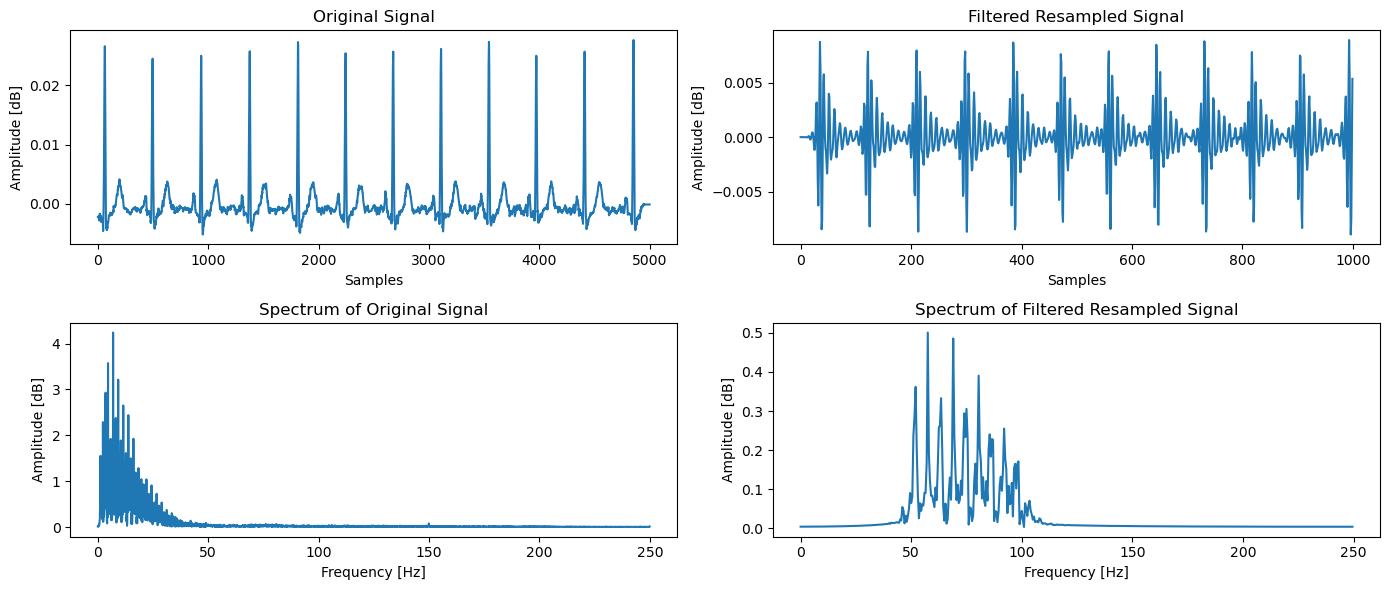

In [20]:
# signal has been filtered already in the previous cell

# plot
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
plt.plot(original_signal)
plt.title('Original Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude [dB]')

plt.subplot(2, 2, 2)
plt.plot(filtered_signal)
plt.title('Filtered Resampled Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude [dB]')

# spectrum func - fft and plot
def plot_spectrum(signal, original_sample_rate, title):
    spectrum = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), d=1/original_sample_rate)

    plt.plot(frequencies[:len(signal)//2], np.abs(spectrum[:len(signal)//2]))
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')

# plot spectrums
plt.subplot(2, 2, 3)
plot_spectrum(original_signal, original_sample_rate, 'Spectrum of Original Signal')

plt.subplot(2, 2, 4)
plot_spectrum(filtered_signal, original_sample_rate, 'Spectrum of Filtered Resampled Signal')

plt.tight_layout()
plt.show()

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?

Nefiltrovaný signál obsahuje celé spektrum frekvencí, včetně šumu a rušení.   
Filtrovaný signál obsahuje pouze frekvence pásmové propusti, 10-20 Hz, bez šumu a rušení na frekvencích mimo pásmovnou propust.  
Spektrum nefiltrovaného signálu ukazuje všechny frekvence z původního signálu.  
Spektrum filtrovaného signálů ukazuje frekvence pouze v rozmezí 10-20 Hz, mimo toto rozmezí neukazuje nic.   
Filtr účinně odstranil frekvence mimo pásmovou propust.

Největší Teoretické Posunutí ve vzorcích = polovina délky impulzní odezvy filtru

Protože každý výstupní vzorek je ovlivněn vzorky vstupního signálu, které přicházejí **před** a po časovém bodě vzorku. Toto vytváří fázový posun, protože výstupní signál reaguje na změny vstupního signálu s určitým zpožděním = polovina délky impulzní odezvy

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

   a) [1b] Detekujte QRS v **převzorkovaném vyfiltrovaném** signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

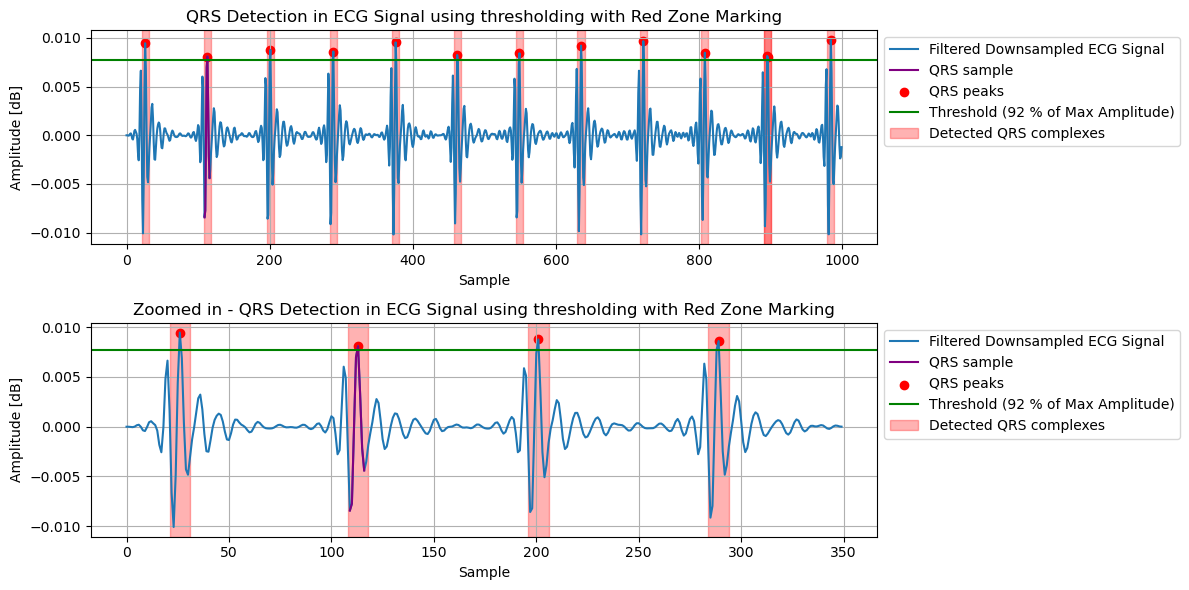

In [21]:
from scipy.signal import butter, lfilter, decimate, resample

# flipped QRS complex is invalid ?

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def downsample_signal(data, original_fs, target_fs):
    decimation_factor = original_fs / target_fs

    # Check if int
    if decimation_factor.is_integer():
        downsampled_signal = decimate(data, int(decimation_factor), zero_phase=True)
    else:
        num_samples = int(len(data) * target_fs / original_fs)
        downsampled_signal = resample(data, num_samples)

    return downsampled_signal

# bandpass filter
filtered_data = bandpass_filter(original_signal, 10, 20, original_sample_rate)

# Downsample
downsampled_data = downsample_signal(filtered_data, original_sample_rate, 100)

# Save signal to pretty variable
signal_to_process = downsampled_data

# Second QRS complex in the signal
# using the second QRS complex because it is more prominent
qrs1_start = 109
qrs1_end = 117

# Max amplitude of the QRS sample
reference_qrs = signal_to_process[qrs1_start:qrs1_end] 
max_amplitude = np.max(np.abs(reference_qrs))

qrs_sample = signal_to_process[109:118]

# Calculate maximum amplitude of the QRS sample
max_amplitude = np.max(np.abs(qrs_sample))

# select the threshold
threshold = 0.92 * max_amplitude

qrs_detected = np.where(signal_to_process > threshold)[0]

# plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal_to_process, label='Filtered Downsampled ECG Signal')
plt.plot(range(qrs1_start, qrs1_end), signal_to_process[qrs1_start:qrs1_end], label="QRS sample", color='purple')
plt.scatter(qrs_detected, signal_to_process[qrs_detected], color='red', label='QRS peaks')
plt.axhline(y=threshold, color='g', linestyle='-', label='Threshold (92 % of Max Amplitude)')

# red zones for detected peaks
first_label = True
for peak in qrs_detected:
    if first_label:
        plt.axvspan(peak - 5, peak + 5, color='red', alpha=0.3, label='Detected QRS complexes')  # only one label for the legend
        first_label = False
    else:
        plt.axvspan(peak - 5, peak + 5, color='red', alpha=0.3)
    
plt.title('QRS Detection in ECG Signal using thresholding with Red Zone Marking')
plt.xlabel('Sample')
plt.ylabel('Amplitude [dB]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# plot until sample 350
plt.subplot(2, 1, 2)
plt.plot(signal_to_process[:350], label='Filtered Downsampled ECG Signal')
plt.plot(range(qrs1_start, qrs1_end), signal_to_process[qrs1_start:qrs1_end], label="QRS sample", color='purple')
plt.scatter(qrs_detected[qrs_detected < 350], signal_to_process[qrs_detected[qrs_detected < 350]], color='red', label='QRS peaks')
plt.axhline(y=threshold, color='g', linestyle='-', label='Threshold (92 % of Max Amplitude)')

# red zones for detected peaks
first_label = True
for peak in qrs_detected:
    if peak < 350:
        if first_label:
            plt.axvspan(peak - 5, peak + 5, color='red', alpha=0.3, label='Detected QRS complexes')  # only one label for the legend
            first_label = False
        else:
            plt.axvspan(peak - 5, peak + 5, color='red', alpha=0.3)

plt.title('Zoomed in - QRS Detection in ECG Signal using thresholding with Red Zone Marking')
plt.xlabel('Sample')
plt.ylabel('Amplitude [dB]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v **převzorkovaném nefiltrovaném** signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

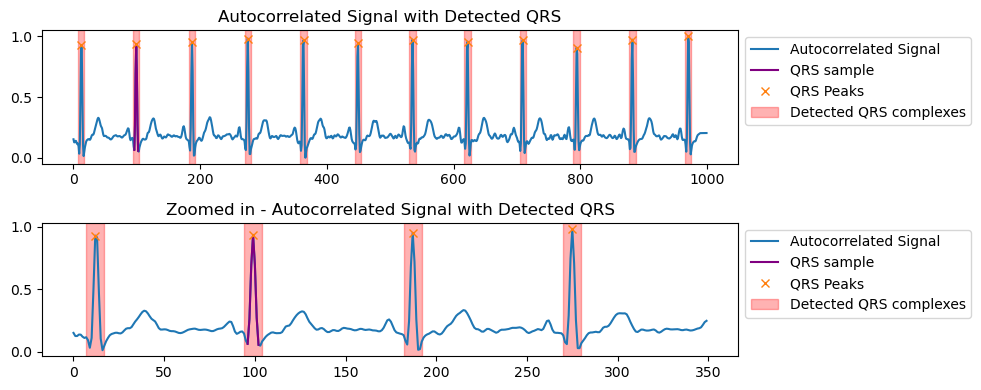

In [22]:
from scipy.signal import butter, lfilter, decimate

# reused from previous cell
def downsample_signal(data, original_fs, target_fs):
    decimation_factor = original_fs / target_fs

    if decimation_factor.is_integer():
        downsampled_signal = decimate(data, int(decimation_factor), zero_phase=True)
    else:
        num_samples = int(len(data) * target_fs / original_fs)
        downsampled_signal = resample(data, num_samples)

    return downsampled_signal

# Downsample
downsampled_data = downsample_signal(original_signal, original_sample_rate, 100)

# Save signal to pretty variable
signal_to_process = downsampled_data

import scipy.signal as signal

# Second QRS complex in the signal
# using the second QRS complex because it is more prominent
qrs1_start = 96
qrs1_end = 103

QRS_sample = signal_to_process[qrs1_start:qrs1_end]

# autocorrelation of the signal with the QRS sample
correlation = signal.correlate(signal_to_process, QRS_sample, mode='same')

# Normalizing the correlation for easier thresholding
correlation_normalized = (correlation - np.min(correlation)) / (np.max(correlation) - np.min(correlation))

# set threshold 
threshold = 0.5

# detect peaks in normalized correlation
peaksAC, _ = signal.find_peaks(correlation_normalized, height=threshold)

# plot
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(correlation_normalized, label='Autocorrelated Signal')
plt.plot(range(qrs1_start, qrs1_end), correlation_normalized[qrs1_start:qrs1_end], label="QRS sample", color='purple')
plt.plot(peaksAC, correlation_normalized[peaksAC], 'x', label='QRS Peaks')
plt.title('Autocorrelated Signal with Detected QRS')

# red zones for detected peaks
first_label = True
for peak in peaksAC:
    if first_label:
        plt.axvspan(peak - 5, peak + 5, color='red', alpha=0.3, label='Detected QRS complexes')  # only one label for the legend
        first_label = False
    else:
        plt.axvspan(peak - 5, peak + 5, color='red', alpha=0.3)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plot
plt.subplot(2, 1, 2)

plt.plot(correlation_normalized[:350], label='Autocorrelated Signal')
plt.plot(range(qrs1_start, qrs1_end), correlation_normalized[qrs1_start:qrs1_end], label="QRS sample", color='purple')

# Filter peaksAC
peaks_within_limit = [peak for peak in peaksAC if peak < 350]
plt.plot(peaks_within_limit, correlation_normalized[peaks_within_limit], 'x', label='QRS Peaks')
plt.title('Zoomed in - Autocorrelated Signal with Detected QRS')

# red zones for detected peaks
first_label = True
for peak in peaksAC:
    if peak < 350:
        if first_label:
            plt.axvspan(peak - 5, peak + 5, color='red', alpha=0.3, label='Detected QRS complexes')  # only one label for the legend
            first_label = False
        else:
            plt.axvspan(peak - 5, peak + 5, color='red', alpha=0.3)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného **převzorkovaného filtrovaného** signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. 
Spektrogram dále normalizujte v čase. 
Spočítejte sumy energie spektra pro jednotlivé časové biny. 
Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. 
Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

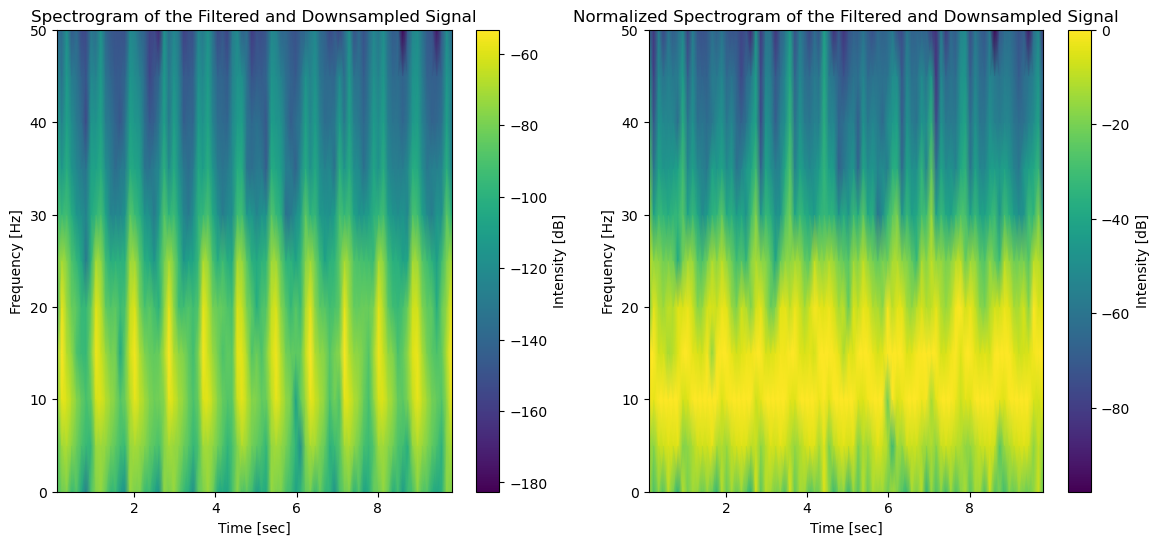

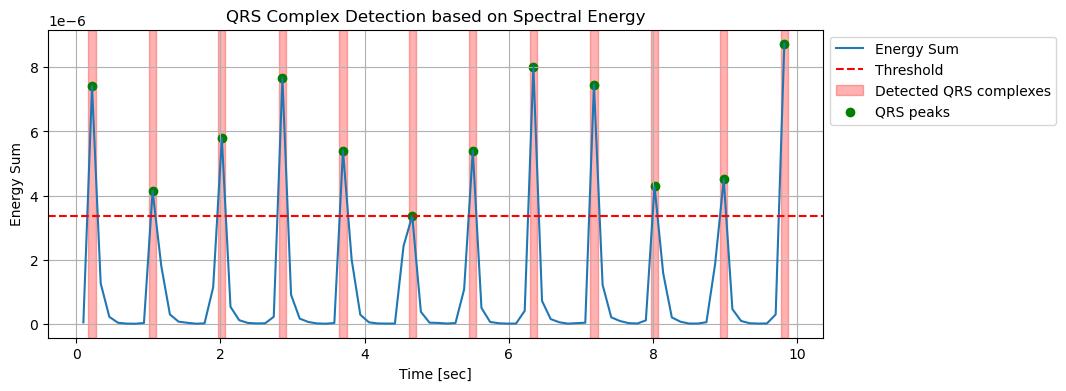

In [23]:
import scipy.signal

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# reused from previous cell
def downsample_signal(data, original_fs, target_fs):
    decimation_factor = original_fs / target_fs

    if decimation_factor.is_integer():
        downsampled_signal = decimate(data, int(decimation_factor), zero_phase=True)
    else:
        num_samples = int(len(data) * target_fs / original_fs)
        downsampled_signal = resample(data, num_samples)

    return downsampled_signal

# bandpass filter
filtered_data = bandpass_filter(original_signal, 10, 20, original_sample_rate)

# Downsample
downsampled_data = downsample_signal(filtered_data, original_sample_rate, 100)

# Save signal to pretty variable
signal_to_process = downsampled_data

# new sample rate
sample_rate = 100

# Parameters for the spectrogram, in milliseconds
hop_size_ms = 120 
window_len_ms = 200

# milliseconds to samples
hop_size = int(hop_size_ms * sample_rate / 1000)
window_len = int(window_len_ms * sample_rate / 1000)

# spectrogram
frequencies, times, spectrogram = scipy.signal.spectrogram(
    signal_to_process, 
    fs=sample_rate, 
    window='hann', 
    nperseg=window_len, 
    noverlap=window_len - hop_size, 
    scaling='density'
)

# Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of the Filtered and Downsampled Signal')
plt.colorbar(label='Intensity [dB]')

# Normalization of the spectrogram in time
spectrogram_normalized = spectrogram / spectrogram.max(axis=0)

# Plot
plt.subplot(1, 2, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_normalized), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Normalized Spectrogram of the Filtered and Downsampled Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()

# calculate the energy sums for each time bin
energy_sums = np.sum(spectrogram, axis=0)

from scipy.signal import find_peaks

peaks, _ = find_peaks(energy_sums)

# manualy selected QRS complex with the lowest energy (smallest peak)
first_qrs_index = peaks[5]

first_qrs_time = times[first_qrs_index]
first_qrs_energy = energy_sums[first_qrs_index]

# set threshold
threshold = first_qrs_energy

# detect peaks in energy sums
qrs_indices = np.where(energy_sums >= threshold)[0]
qrs_times = times[qrs_indices]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(times, energy_sums, label='Energy Sum')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

# red zones for detected peaks
first_label = True
for qrs_time in qrs_times:
    if first_label:
        plt.axvspan(qrs_time - 0.05, qrs_time + 0.05, color='red', alpha=0.3, label='Detected QRS complexes') # only one label for the legend
        first_label = False
    else:
        plt.axvspan(qrs_time - 0.05, qrs_time + 0.05, color='red', alpha=0.3)

plt.scatter(qrs_times, energy_sums[qrs_indices], color='g', label='QRS peaks')
plt.xlabel('Time [sec]')
plt.ylabel('Energy Sum')
plt.title('QRS Complex Detection based on Spectral Energy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

Detekci QRS poté provedete opět prahováním, tentokrát ale obálky signálu.

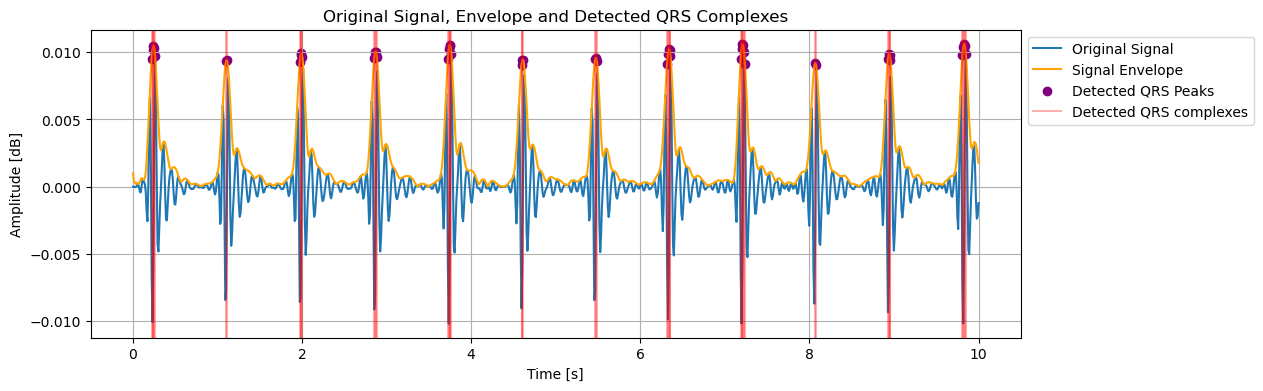

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

# signal_to_process is the downsampled and filtered signal

sample_rate = 100
t = np.linspace(0.0, 10.0, len(signal_to_process))

# FFT
signal_fft = fft(signal_to_process)

# number of samples
N = signal_fft.size

# zero the right half of the spectrum
half_N = N // 2
signal_fft[half_N:] = 0

# multiply the left half of the spectrum by 2 (except the first and the middle bin)
signal_fft[1:half_N] *= 2

# reverse FFT
hilbert_signal = ifft(signal_fft)

# Envelope
envelope = np.abs(hilbert_signal)

# 85% of max value of envelope
threshold = np.max(envelope) * 0.85  
qrs_peaks = np.where(envelope > threshold)[0]

# Plot
plt.figure(figsize=(12, 4))
plt.plot(t, signal_to_process, label='Original Signal')
plt.plot(t, envelope, label='Signal Envelope', color='orange')
plt.scatter(t[qrs_peaks], envelope[qrs_peaks], label='Detected QRS Peaks', color='purple')

## Mark each detected QRS peak with a red zone
first_label = True
for peak in qrs_peaks:
    if first_label:
        plt.axvline(x=t[peak], color='red', alpha=0.3, label='Detected QRS complexes')  # only one label for the legend
        first_label = False
    else:
        plt.axvline(x=t[peak], color='red', alpha=0.3)
    
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [dB]')
plt.title('Original Signal, Envelope and Detected QRS Complexes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

Při metodách prahování nám to vadí, jelikož porovnáváme hodnotu signálu s kladnou hodnotou. Otočený QRS má zápornou hodnotu, takže není detekován.

Při korelaci porovnáváme signál s předem definovaným segmentem. Pokud signál otočíme, budou QRS zrcadlově a to povede k nízké korelaci. Vadí nám to.

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. 
Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. 
Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. 
Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

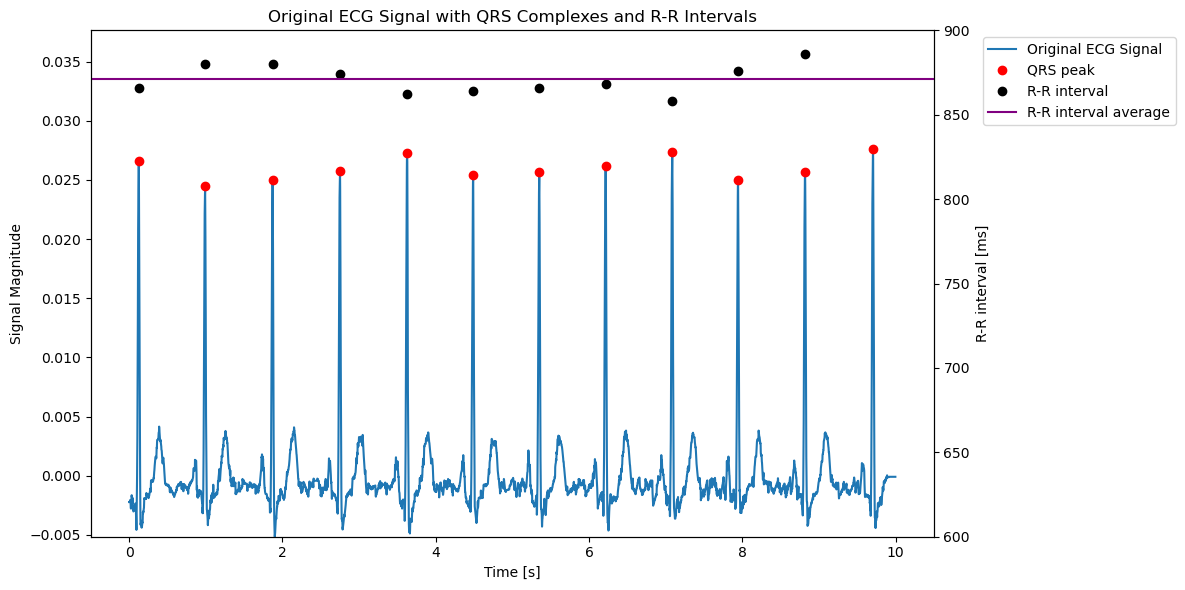

In [25]:
time_axis = np.arange(0, len(original_signal)) / original_sample_rate

# Threshold
threshold = 0.024

# detect peaks above the threshold
peaks = np.where(original_signal > threshold)[0]

# Define a window size for refining peaks
window_size_samples = int(0.1 * original_sample_rate)  # 0.1 seconds in samples

refined_peaks = []
current_max_peak = None
current_max_value = None

# Iterate through peaks and keep only the highest peak in each window
for peak in peaks:
    if current_max_peak is None or peak > current_max_peak + window_size_samples:
        # If outside the current window, start new window
        if current_max_peak is not None:
            refined_peaks.append(current_max_peak)
        current_max_peak = peak
        current_max_value = original_signal[peak]
    elif original_signal[peak] > current_max_value:
        # Update max peak in the window
        current_max_peak = peak
        current_max_value = original_signal[peak]

# Add last peak if it's the max in its window
if current_max_peak is not None:
    refined_peaks.append(current_max_peak)

# Convert to numpy array for consistency
refined_peaks = np.array(refined_peaks)

# time difference between peaks
peak_distances = np.diff(refined_peaks) / original_sample_rate

average_peak_distance = np.mean(peak_distances)*1000

# ranges for Y-axes based on the data
signal_min, signal_max = np.min(original_signal), np.max(original_signal) + 0.01

# peak_distances_min, peak_distances_max = np.min(peak_distances)-0.2, np.max(peak_distances)+0.002
peak_distances_min, peak_distances_max = 600, 900 # fixed range for better visualization

# plot
plt.figure(figsize=(12, 6))

ax1 = plt.gca()
ax1.plot(time_axis, original_signal, label='Original ECG Signal')
ax1.set_ylabel('Signal Magnitude')
ax1.tick_params(axis='y')
ax1.set_ylim(signal_min, signal_max)  # scaling for signal 

# refined peaks - label only the first one for legend
first_label = True
for peak in refined_peaks:
    if first_label:
        ax1.plot(time_axis[peak], original_signal[peak], 'ro', label='QRS peak')  # Red dot
        first_label = False
    else:
        ax1.plot(time_axis[peak], original_signal[peak], 'ro')  # Red dot without label

# secondary Y-axis for the peak distances
ax2 = ax1.twinx()
first_label = True
for i, peak in enumerate(refined_peaks[:-1]):
    distance = peak_distances[i]*1000
    if first_label:
        ax2.plot(time_axis[peak], distance, 'ko', label='R-R interval')  # Black dot
        first_label = False
    else:
        ax2.plot(time_axis[peak], distance, 'ko')  # Black dot
        
ax2.set_ylabel('R-R interval [ms]', color='k')
ax2.axhline(y=average_peak_distance, linestyle='-', label='R-R interval average', color='purple') # average value R-R interval
ax2.tick_params(axis='y', labelcolor='k')
ax2.set_ylim(peak_distances_min, peak_distances_max)  # scaling for peak distances


plt.title('Original ECG Signal with QRS Complexes and R-R Intervals')
ax1.set_xlabel('Time [s]')
ax1.grid(False)

# Collect handles and labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
combined_handles = handles1 + handles2
combined_labels = labels1 + labels2

# Create a single legend
ax1.legend(combined_handles, combined_labels, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()